In [21]:
import numpy as np
from numpy import unique_values
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/raw/Absence_3term201819_nat_reg_la_sch.csv')

# Calculate missing values and their percentage
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame with missing values and their percentage
df_missing = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

display(df_missing[:10])

unique_values = df.nunique().sort_values(ascending=True)
display(f"unique values: \n",
        unique_values[:20])

/tmp/ipykernel_159951/415150081.py:6: DtypeWarning: Columns (13,15,16,17,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/Absence_3term201819_nat_reg_la_sch.csv')


,Missing Values,Percentage
all_through,281607,98.718376
academy_open_date,249005,87.289624
academy_type,247384,86.721376
estab,8400,2.944651
laestab,8400,2.944651
urn,8400,2.944651
old_la_code,572,0.200517
la_name,572,0.200517
new_la_code,572,0.200517
region_code,52,0.018229


'unique values: \n'

time_identifier              1
country_code                 1
country_name                 1
year_breakdown               2
all_through                  3
geographic_level             4
school_type                  4
region_name                 10
region_code                 10
academy_type                11
time_period                 13
new_la_code                153
la_name                    154
old_la_code                154
academy_open_date          187
num_schools                762
sess_auth_ext_holiday     2369
estab                     2847
sess_auth_traveller       2997
enrolments_pa_10_exact    5006
dtype: int64

estab
2000.0    1171
2001.0    1160
6905.0    1128
2002.0    1072
2003.0     956
          ... 
5245.0       1
4414.0       1
4577.0       1
4582.0       1
4720.0       1
Name: count, Length: 2847, dtype: int64

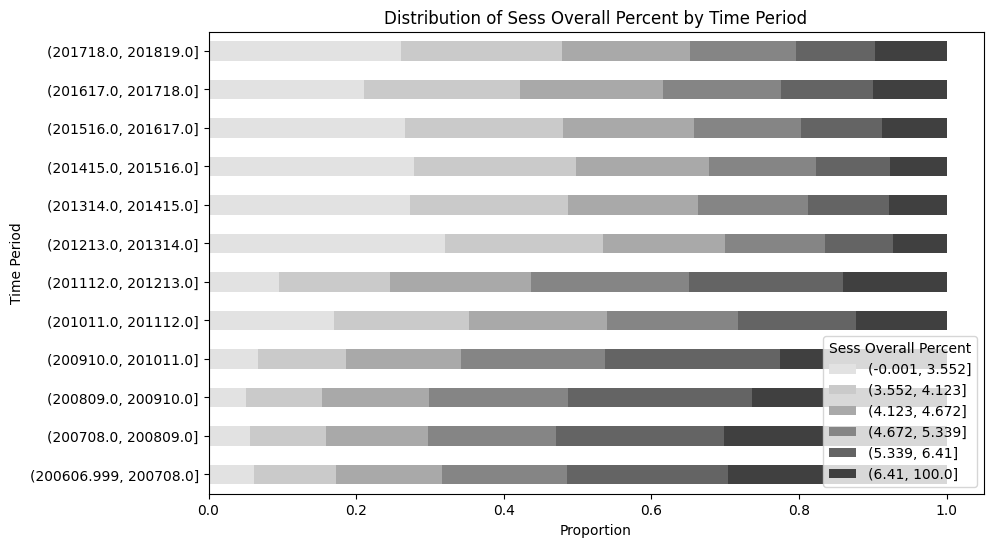

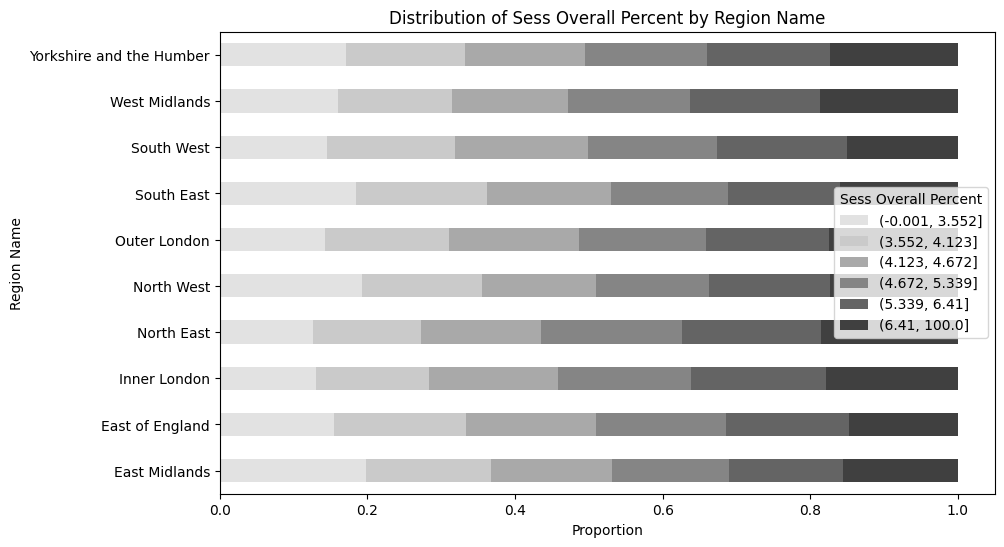

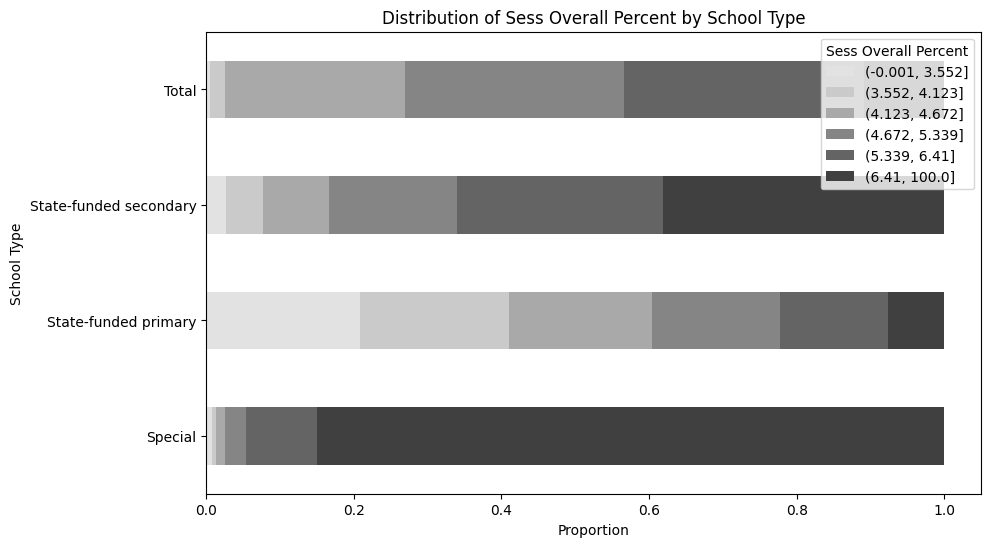

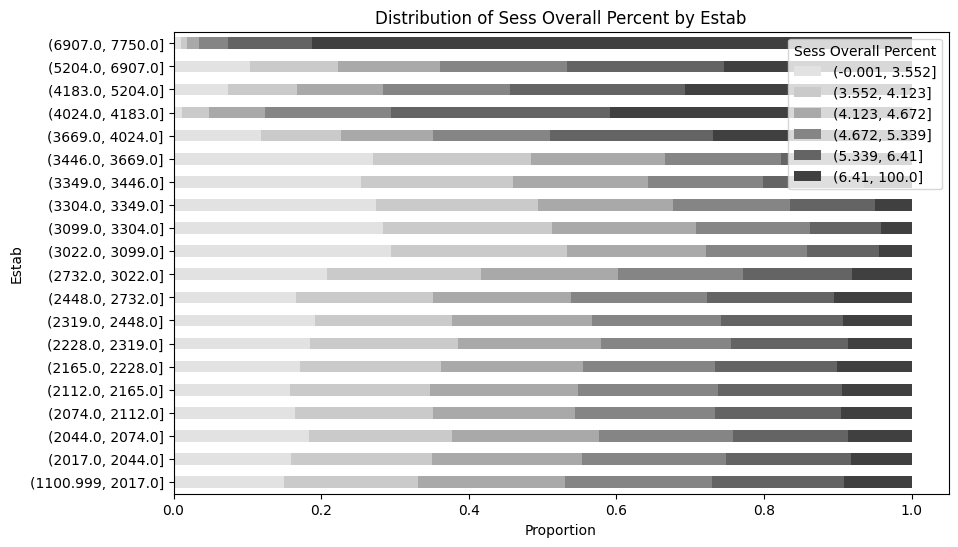

In [ ]:
# analyse values in relation to absence

def plot_stacked_bar(df, columns, target_col):
    """
    Plots stacked horizontal bar charts for each categorical column provided.
    
    Parameters:
    df (pd.DataFrame): The input dataframe containing the categorical variables.
    columns (list): List of categorical column names to visualize.
    target_col (String): The target column to compare the categorical columns with.
    """

    # Check if the target column has more than 10 unique values or is numerical
    if df[target_col].nunique() > 6 or pd.api.types.is_numeric_dtype(df[target_col]):
        # Create 10 string categories
        target_column = pd.qcut(df[target_col], 6, duplicates='drop')
    else:
        target_column = df[target_col]

    for col in columns:
        if col not in df.columns:
            print(f"Column '{col}' not found in dataframe. Skipping.")
            continue

        if df[col].nunique() > 20 or pd.api.types.is_numeric_dtype(df[col]):
            # Create 20 string categories
            column = pd.qcut(df[col], 20, duplicates='drop')
        else:
            column = df[col]
        
        # Group by the selected column and target column
        df_grouped = df.groupby([column, target_column], observed=True).size().unstack(fill_value=0)
        
        # Normalize to get proportions
        df_normalized = df_grouped.div(df_grouped.sum(axis=1), axis=0)
        
        # Plot
        num_categories = target_column.nunique()
        colors = plt.cm.Greys(np.linspace(0.2, 0.8, num_categories))
        ax = df_normalized.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors)
        
        # Labels and title
        plt.xlabel('Proportion')
        plt.ylabel(col.replace('_', ' ').title())
        plt.title(f"Distribution of {target_column.name.replace('_', ' ').title()} by {col.replace('_', ' ').title()}")
        plt.legend(title=target_column.name.replace('_', ' ').title())
        
        plt.savefig(f"plots/{col}_{target_column.name}_distribution.png")
        plt.show()

# Group sess_unauthorised_percent into 10 logarithmic bins
plot_stacked_bar(df, ['time_period', 'region_name', 'school_type', 'estab'], 'sess_overall_percent')
